* In some CV Applications it is often necessary to convert color images to grayscale, when only edges and shapes end up being important.
<center><i><b>E.g. You dont actually need to know the color of a shirt to get the outline of a shirt<b><i><center/>

* Similarly, some applications only require a binary image showing general shapes
<center><i><b>Not even just gray scale but also with black and white <b><i><center/>

# Thresholding

* Thresholding is fundamentally a very simple method of segmenting an image into different parts.
* Separate out regions of an image corresponding to objects which we want to analyze.
* This separation is based on the variation of intensity between the object pixels and the background pixels.
* To differentiate the pixels we are interested in from the rest (which will eventually be rejected), we perform a comparison of each pixel intensity value with respect to a threshold (determined according to the problem to solve).
* Once we have separated properly the important pixels, we can set them with a determined value to identify them (i.e. we can assign them a value of 0 (black), 255 (white) or any value that suits your needs)
* Thresholding will convert an image to consist of only two values, white or black.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(550, 413, 3)
(550, 413)


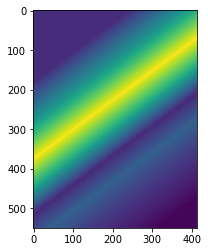

In [7]:
img = cv2.imread('../Data/rainbow.jpg')
print(img.shape)
img = cv2.imread('../Data/rainbow.jpg',0)
print(img.shape)
plt.imshow(img)
# cv2.imshow('Rainbow',img)
# cv2.waitKey(0)

In [7]:
img

array([[107, 107, 107, ..., 169, 170, 171],
       [103, 103, 103, ..., 169, 170, 171],
       [103, 103, 103, ..., 169, 170, 171],
       ...,
       [115, 115, 115, ...,  88,  89,  91],
       [116, 116, 116, ...,  89,  91,  93],
       [118, 118, 118, ...,  93,  94,  96]], dtype=uint8)

### CV::THRESH_BINARY

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      maxVal & if & scr(x,y)>thresh \\
      0 && otherwise \\
\end{array} 
\right.  $$ 

In [8]:
# threshold function is basically going to apply thresholding 
# src, thresh, maxval, type
# src - source image
# thresh - values below a specific thresh get returned to 0 (for thresh value we usually use halfway point which is 127(255/2))
# maxval - values above thresh will be equal to maxval
# type - type of thresholding we want to use cv2.THRESH_(there are mulitple available)
# the function will return retval(thresh value),dst(our image) 

thresh,img1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# here all the values below 127 will now be changed to 0 and values greater than 127 will now be changed to 255

# in the formula of THRESH_BINARY and all other formula of THRESH src(x,y) is representing pixels 
# src(5,5) representing a single pixel but src(x,y) representing every pixel thats why we use it in formula with condition

# how thresholding works?
# [ https://docs.opencv.org/3.4/db/d8e/tutorial_threshold.html ]
# [ https://learnopencv.com/opencv-threshold-python-cpp/#:~:text=In%20addition%20to%20the%20source,called%20maximum%20value%20(%20maxValue%20).&text=If%20src%20(%20x%20%2C%20y%20)%20is%20greater%20than%20thresh%2C,it%20sets%20it%20to%20zero. ]

In [9]:
thresh

127.0

(550, 413)


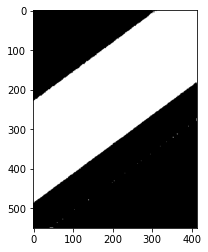

In [11]:
print(img.shape)
plt.imshow(img1,cmap='gray')

### CV::THRESH_BINARY_INV

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      0 & if & scr(x,y)>thresh \\
      maxVal && otherwise \\
\end{array} 
\right.  $$ 

In [12]:
# lets try working with different types of thresholding

thresh2,img2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) 
# THRESH_BINARY_INV will do the inverse of the THRESH_BINARY 

In [13]:
thresh2

127.0

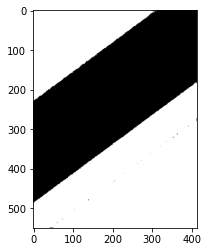

In [14]:
plt.imshow(img2,cmap='gray') 

### CV::THRESH_TRUNC

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      threshold & if & scr(x,y)>thresh \\
      scr(x,y) && otherwise \\
\end{array} 
\right.  $$ 

* The maximum intensity value for the pixels is thresh, if src(x,y) is greater, then its value is truncated.

In [15]:
thresh3,img3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) 
thresh3

127.0

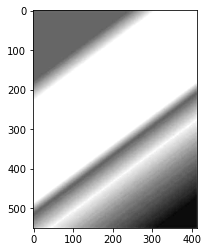

In [16]:
plt.imshow(img3,'gray')

### CV::THRESH_TOZERO

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      scr(x,y) & if & scr(x,y)>thresh \\
      0 && otherwise \\
\end{array} 
\right.  $$ 

In [17]:
thresh4,img4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) 
thresh4

127.0

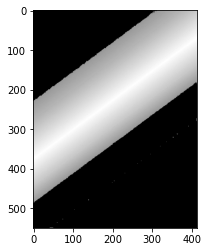

In [18]:
plt.imshow(img4,'gray')

### CV::THRESH_TOZERO_INV

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      0 & if & scr(x,y)>thresh \\
      scr(x,y) && otherwise \\
\end{array} 
\right.  $$ 

In [19]:
thresh5,img5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) 
thresh5

127.0

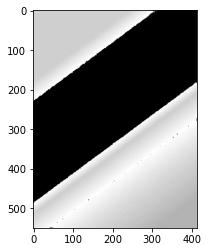

In [20]:
plt.imshow(img5,'gray')

# <center>Real World Example

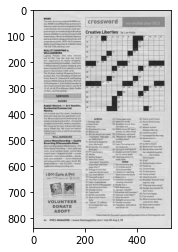

In [21]:
# Lets work on real world example

img = cv2.imread('../Data/crossword.jpg',0) # 0 for gray scale
plt.imshow(img,'gray') # the image looks very small lets try to make it big larger

In [23]:
def large_img(img):
    fig = plt.figure(figsize=(15,15))
    pic = fig.add_subplot(111) # or we can do subplot(1,1,1) 
    # 1 row , 1 column (1*1 = 1) and last 1 is for index(which ofcourse is only 1 in this case)
    pic.imshow(img,'gray')

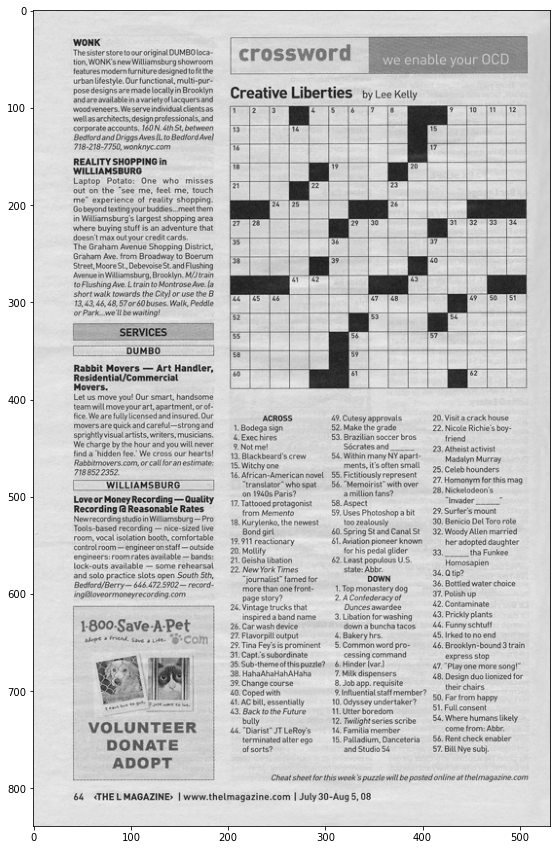

In [24]:
large_img(img)

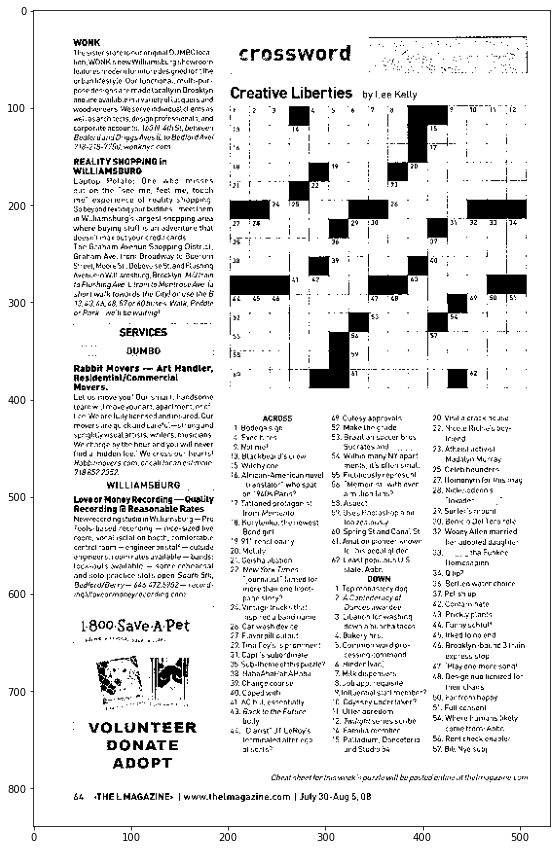

In [25]:
thresh6,img6 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
large_img(img6)

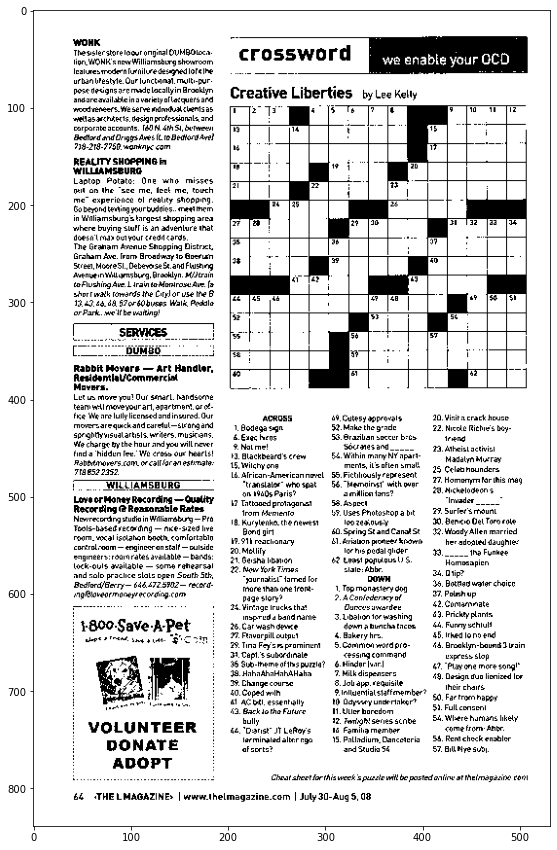

In [26]:
# lets try experimenting with different thresh values
thresh6,img6 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
large_img(img6)

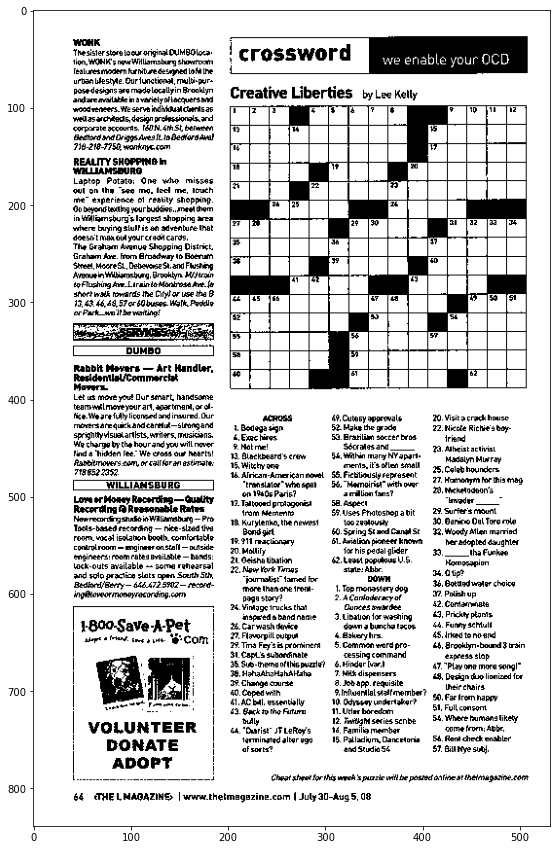

In [27]:
thresh6,img6 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
large_img(img6)

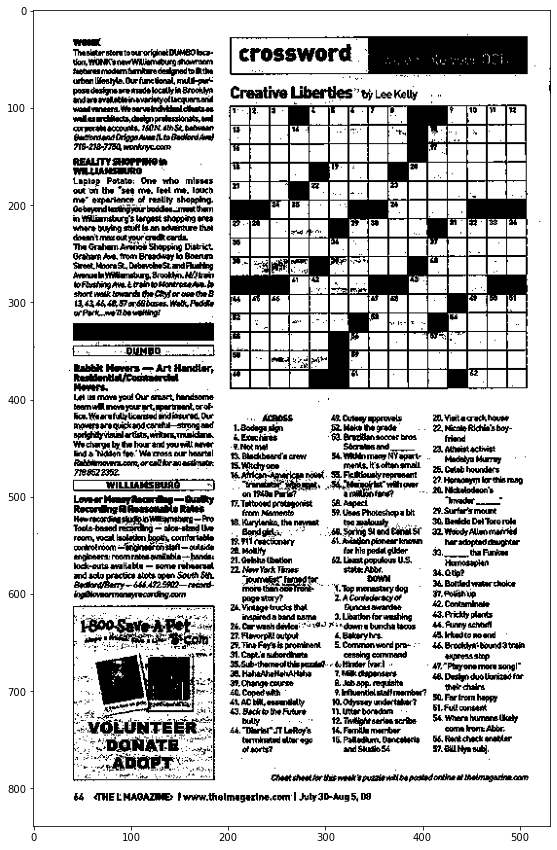

In [28]:
thresh6,img6 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
large_img(img6)

## Another way to do what we did above by using Adaptive Threshold

###  cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
$Parameters:$	
* src – Source 8-bit single-channel image.
* dst – Destination image of the same size and the same type as src .
* maxValue – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
* adaptiveMethod – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
* thresholdType – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
* blockSize – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
* C – Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

* The function transforms a grayscale image to a binary image according to the formulae:

#### CV::THRESH_BINARY

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      MaxValue & if & scr(x,y)>T(x,y) \\
      0 && otherwise \\
\end{array} 
\right.  $$ 

#### CV::THRESH_BINARY_INV

$$ dst(x,y)=   \left\{
\begin{array}{ll}
      0 & if & scr(x,y)>T(x,y) \\
      MaxValue && otherwise \\
\end{array} 
\right.  $$ 

* where T(x,y) is a threshold calculated individually for each pixel.
* For the method ADAPTIVE_THRESH_MEAN_C , the threshold value T(x,y) is a mean of the blockSize x blockSize neighborhood of (x, y) minus C .
* For the method ADAPTIVE_THRESH_GAUSSIAN_C , the threshold value T(x, y) is a weighted sum (cross-correlation with a Gaussian window) of the blockSize x blockSize neighborhood of (x, y) minus C . The default sigma (standard deviation) is used for the specified blockSize.

More to learn from here,
* [ https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html ]
* [ https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion ]

In [29]:
# the best thing about adaptive threshold is it tries to adapt automatically the threshold value based on the pixel.

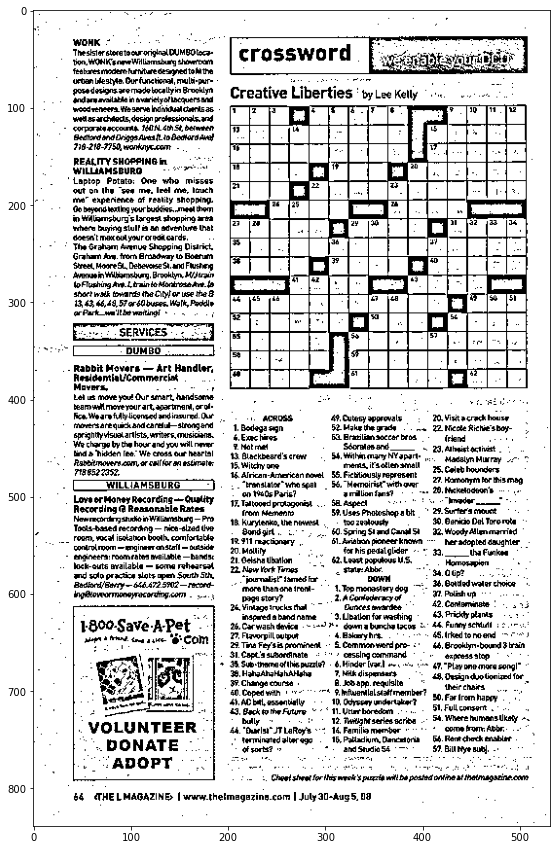

In [30]:
img7 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)
large_img(img7)

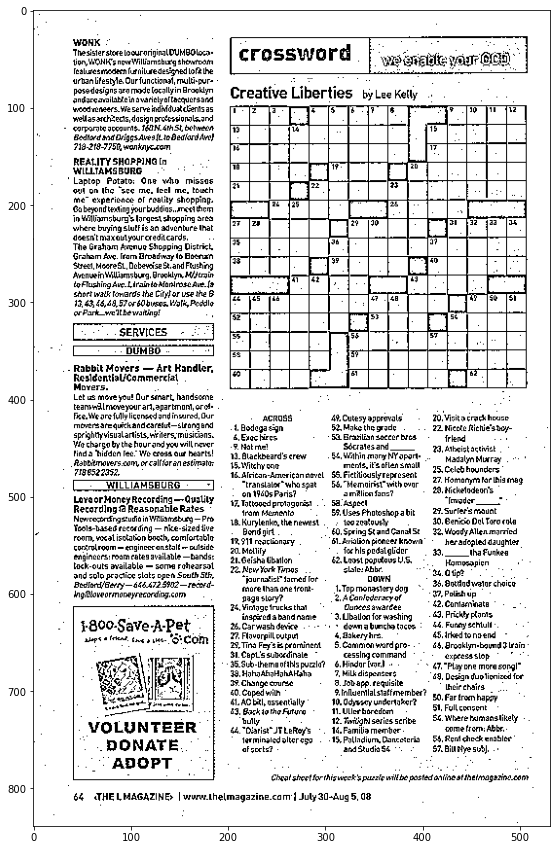

In [34]:
img8 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,7,9)
large_img(img8)